Unzipping complete. Files extracted to: C:\Users\vrand\23UADS4171-Vranda-Manihar-NNLAB-2025-2\Experiment 7\ISIC-images
Created 'normal', 'melanoma', 'benign', 'suspicious' directories inside the train directory.
Images have been moved into respective folders.
Found 50 images belonging to 4 classes.


c:\Users\vrand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 2.0044
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 1.6510
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step - accuracy: 0.6111 - loss: 0.8481
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9688 - loss: 0.4170
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1927
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step - accuracy: 1.0000 - loss: 0.1112
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0389
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - accuracy: 1.0000 - loss: 0.0199
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step - accuracy: 1.0000 - loss: 0.0123
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0084


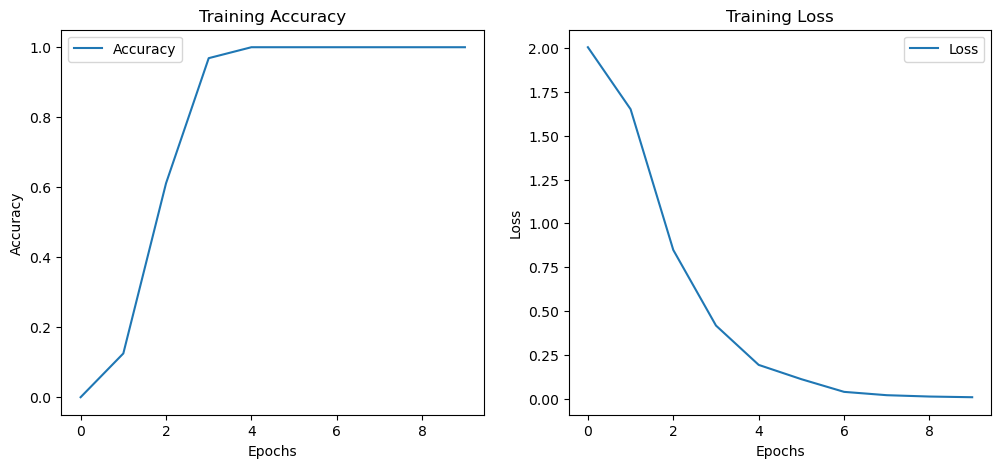

Found 50 images belonging to 4 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 724ms/step - accuracy: 1.0000 - loss: 0.0050

Test Loss: 0.0049
Test Accuracy: 1.0000


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F6D1D06160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


Model training complete. Model saved as 'isic_model.h5'.


In [4]:
import zipfile
import os
import shutil
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

# Paths
zip_file_path = r"C:\Users\vrand\23UADS4171-Vranda-Manihar-NNLAB-2025-2\Experiment 7\ISIC-images.zip"
extracted_dir = r"C:\Users\vrand\23UADS4171-Vranda-Manihar-NNLAB-2025-2\Experiment 7\ISIC-images"
train_dir = r"C:\Users\vrand\23UADS4171-Vranda-Manihar-NNLAB-2025-2\Experiment 7\ISIC-train"

# Step 1: Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print("Unzipping complete. Files extracted to:", extracted_dir)

# Step 2: Create subfolders for 'normal', 'melanoma', 'benign', 'suspicious' if they do not exist
normal_dir = os.path.join(train_dir, 'normal')
melanoma_dir = os.path.join(train_dir, 'melanoma')
benign_dir = os.path.join(train_dir, 'benign')
suspicious_dir = os.path.join(train_dir, 'suspicious')

# Create directories if they do not exist
for dir_path in [normal_dir, melanoma_dir, benign_dir, suspicious_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

print("Created 'normal', 'melanoma', 'benign', 'suspicious' directories inside the train directory.")

# Step 3: Move images into respective directories
image_files = os.listdir(extracted_dir)
for image in image_files:
    image_path = os.path.join(extracted_dir, image)
    if os.path.isfile(image_path):
        # Example logic based on filename or other criteria
        if 'melanoma' in image.lower():
            shutil.move(image_path, os.path.join(melanoma_dir, image))
        elif 'benign' in image.lower():
            shutil.move(image_path, os.path.join(benign_dir, image))
        elif 'suspicious' in image.lower():
            shutil.move(image_path, os.path.join(suspicious_dir, image))
        else:
            shutil.move(image_path, os.path.join(normal_dir, image))

print("Images have been moved into respective folders.")

# Step 4: Data Preprocessing and Model Training
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,  # Directory containing categorized images
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multiple classes
    shuffle=True
)

# Step 5: Create the Model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes: normal, melanoma, benign, suspicious
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

# Step 7: Performance Evaluation

# Plotting the training loss and accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Evaluate the Model on the Same Data (as test data is not available)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Use the same train_dir for testing (as no separate test set is provided)
test_generator = test_datagen.flow_from_directory(
    train_dir,  # Using the same directory for test (not recommended for real testing)
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set and generate the confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels


# Step 9: Save the trained model
model.save('isic_model.h5')
print("Model training complete. Model saved as 'isic_model.h5'.")
